In [ ]:
There are many algorithms for Regression and Classification---
almost all algorithms used in -- regression and classification ( with little change)
for example-- Regression

-->Linear regression (Lasso,Ridge,Elastic Net-- optimization)
--> KKN regressor
---SVR
Decision Tree Regressor
Ensemble learning approach
Random forest
Bagging 
Boosting- ada boost 
Gradient boosting 
XG B regressor...
NB

classification

-->Logistic  regression-- (only for classification not for regression)
--> KKN classifier
---SVR
Decision Tree classifier
Ensemble learning approach
Random forest
Bagging 
Boosting- ada boost 
Gradient boosting 
XG B classifier...
NB

# classification prediction

In [ ]:
# selection /rejection, yes/no, type i,ii,iii(multi class)

In [ ]:
#Logistic Regression- 

In [2]:
# Linear Regression only for Regression
# Logistic Regression only For Classification

In [2]:
# import the basic library
import os
import numpy as np # mathematical calculation
import pandas as pd # dataframe editing 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



In [3]:
pd.set_option("display.max_columns",30)
# by default we can see upto 20 columns only 
# with the help of above code we can set to see any no. of columns

In [4]:
df=pd.read_csv("Cardio_vascular.csv")

In [5]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

The dataset used in this article is the Cleveland Heart Disease dataset. There are 14 
columns in the dataset,

which are described below.

Age, in years
Sex, 1 = male; 0 = female
cp: chest pain type – Value 0: typical angina – Value 1: atypical angina – 
            Value 2: non-anginal pain – Value 3: asymptomatic
                    
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    
chol: serum cholestoral in mg/d 
fbs: (fasting blood sugar > 120 mg/dl) 1 = true; 0 =false
    
restecg: resting electrocardiographic results – 
    Value 0: normal – 
    Value 1: having ST-T wave abnormality (T wave inversions and/or 
    ST elevation or depression of >0.05 mV) – 
    Value 2: showing probable or definite left ventricu lar hypertrophy by Estes’ criteria
        
thalach: maximum heart rate achieved during stress TEST
    
exang: exercise induced angina, 1 = yes; 0 = no
    
oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment – Value 0: upsloping – 
        Value 1: flat – Value 2: downsloping
                
ca: number of major vessels (0-4) colored by flourosopy
    
thal: thalassmia, 0 = null; 1=normal; 2 = fixed defect; 3 = reversible defect
    
condition (target) : 0 = no disease, 1 = disease

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# changing the name of the columns for better understanding

In [7]:
df.rename(columns={"sex":"gender","cp":"rest_cp","trestbps":"rest_bp","chol":"cholesterol","fbs":"fast_bloodsugar",
                   "restecg":"rest_ecg","thalach":"stress_HR","exang":"Exercise_cp","oldpeak":"STdepression_Exerc",
                   "slope":"STpeak_exerc","ca":"coloured_vessels","thal":"thalassmia","target":"heart_disease"},inplace=True)

In [8]:
df.head(100)

age  gender  rest_cp  rest_bp  cholesterol  fast_bloodsugar  rest_ecg  \
0    52       1        0      125          212                0         1   
1    53       1        0      140          203                1         0   
2    70       1        0      145          174                0         1   
3    61       1        0      148          203                0         1   
4    62       0        0      138          294                1         1   
..  ...     ...      ...      ...          ...              ...       ...   
95   45       0        0      138          236                0         0   
96   57       0        0      128          303                0         0   
97   53       1        0      123          282                0         1   
98   65       1        0      110          248                0         0   
99   76       0        2      140          197                0         2   

    stress_HR  Exercise_cp  STdepression_Exerc  STpeak_exerc  \
0         168            0                 1.0             2   
1         155            1                 3.1             0   
2         125            1                 2.6             0   
3         161            0                 0.0             2   
4         106            0                 1.9             1   
..        ...          ...                 ...           ...   
95        152            1                 0.2             1   
96        159            0                 0.0             2   
97         95            1                 2.0             1   
98        158            0                 0.6             2   
99        116            0                 1.1             1   

    coloured_vessels  thalassmia  heart_disease  
0                  2           3              0  
1                  0           3              0  
2                  0           3              0  
3                  1           3              0  
4                  3           2              0  
..               ...         ...            ...  
95                 0           2              1  
96                 1           2              1  
97                 2           3              0  
98                 2           1              0  
99                 0           2              1  

[100 rows x 14 columns]

In [9]:
df["rest_ecg"].value_counts()

rest_ecg
1    513
0    497
2     15
Name: count, dtype: int64

In [10]:
df["thalassmia"].value_counts()

thalassmia
2    544
3    410
1     64
0      7
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1025 non-null   int64  
 1   gender              1025 non-null   int64  
 2   rest_cp             1025 non-null   int64  
 3   rest_bp             1025 non-null   int64  
 4   cholesterol         1025 non-null   int64  
 5   fast_bloodsugar     1025 non-null   int64  
 6   rest_ecg            1025 non-null   int64  
 7   stress_HR           1025 non-null   int64  
 8   Exercise_cp         1025 non-null   int64  
 9   STdepression_Exerc  1025 non-null   float64
 10  STpeak_exerc        1025 non-null   int64  
 11  coloured_vessels    1025 non-null   int64  
 12  thalassmia          1025 non-null   int64  
 13  heart_disease       1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# optional approach

In [12]:
# optional approach
# how to apply one hot encoding even if our data type is not object
# we can transform the required column datatype as categorical

In [12]:
df["rest_cp"]=pd.Categorical(df["rest_cp"])
df.dtypes

age                      int64
gender                   int64
rest_cp               category
rest_bp                  int64
cholesterol              int64
fast_bloodsugar          int64
rest_ecg                 int64
stress_HR                int64
Exercise_cp              int64
STdepression_Exerc     float64
STpeak_exerc             int64
coloured_vessels         int64
thalassmia               int64
heart_disease            int64
dtype: object

In [13]:
df["rest_ecg"]=pd.Categorical(df["rest_ecg"])
df["STpeak_exerc"]=pd.Categorical(df["STpeak_exerc"])
df["coloured_vessels"]=pd.Categorical(df["coloured_vessels"])
df["thalassmia"]=pd.Categorical(df["thalassmia"])
df.dtypes

age                      int64
gender                   int64
rest_cp               category
rest_bp                  int64
cholesterol              int64
fast_bloodsugar          int64
rest_ecg              category
stress_HR                int64
Exercise_cp              int64
STdepression_Exerc     float64
STpeak_exerc          category
coloured_vessels      category
thalassmia            category
heart_disease            int64
dtype: object

In [14]:
df.head()

age  gender rest_cp  rest_bp  cholesterol  fast_bloodsugar rest_ecg  \
0   52       1       0      125          212                0        1   
1   53       1       0      140          203                1        0   
2   70       1       0      145          174                0        1   
3   61       1       0      148          203                0        1   
4   62       0       0      138          294                1        1   

   stress_HR  Exercise_cp  STdepression_Exerc STpeak_exerc coloured_vessels  \
0        168            0                 1.0            2                2   
1        155            1                 3.1            0                0   
2        125            1                 2.6            0                0   
3        161            0                 0.0            2                1   
4        106            0                 1.9            1                3   

  thalassmia  heart_disease  
0          3              0  
1          3              0  
2          3              0  
3          3              0  
4          2              0

In [15]:
# lets apply the one hot encoding , it will be effective only on categorical data type

In [16]:
df=pd.get_dummies(df,drop_first=1)
df.head()

age  gender  rest_bp  cholesterol  fast_bloodsugar  stress_HR  Exercise_cp  \
0   52       1      125          212                0        168            0   
1   53       1      140          203                1        155            1   
2   70       1      145          174                0        125            1   
3   61       1      148          203                0        161            0   
4   62       0      138          294                1        106            0   

   STdepression_Exerc  heart_disease  rest_cp_1  rest_cp_2  rest_cp_3  \
0                 1.0              0      False      False      False   
1                 3.1              0      False      False      False   
2                 2.6              0      False      False      False   
3                 0.0              0      False      False      False   
4                 1.9              0      False      False      False   

   rest_ecg_1  rest_ecg_2  STpeak_exerc_1  STpeak_exerc_2  coloured_vessels_1  \
0        True       False           False            True               False   
1       False       False           False           False               False   
2        True       False           False           False               False   
3        True       False           False            True                True   
4        True       False            True           False               False   

   coloured_vessels_2  coloured_vessels_3  coloured_vessels_4  thalassmia_1  \
0                True               False               False         False   
1               False               False               False         False   
2               False               False               False         False   
3               False               False               False         False   
4               False                True               False         False   

   thalassmia_2  thalassmia_3  
0         False          True  
1         False          True  
2         False          True  
3         False          True  
4          True         False

In [17]:
df.shape

(1025, 23)

In [19]:
# we are finding the proportion of disease and healthy people in the Dependent variable/target variable

In [18]:
#df.heart_disease.value_counts()
df["heart_disease"].value_counts()

heart_disease
1    526
0    499
Name: count, dtype: int64

In [19]:
# it is balance data set

In [20]:
#checking the null value

In [21]:
df.isnull().sum().sum()

0

In [22]:
#Multivariate Analysis

Multivariate analysis is a statistical method that examines the relationships between 
multiple variables simultaneously. In other words, it is used to analyze several variables 
and how they relate to one another. It is particularly useful when trying to understand 
complex systems,as it allows researchers to identify patterns and relationships that 
may not be apparent with asimple univariate or bivariate analysis.

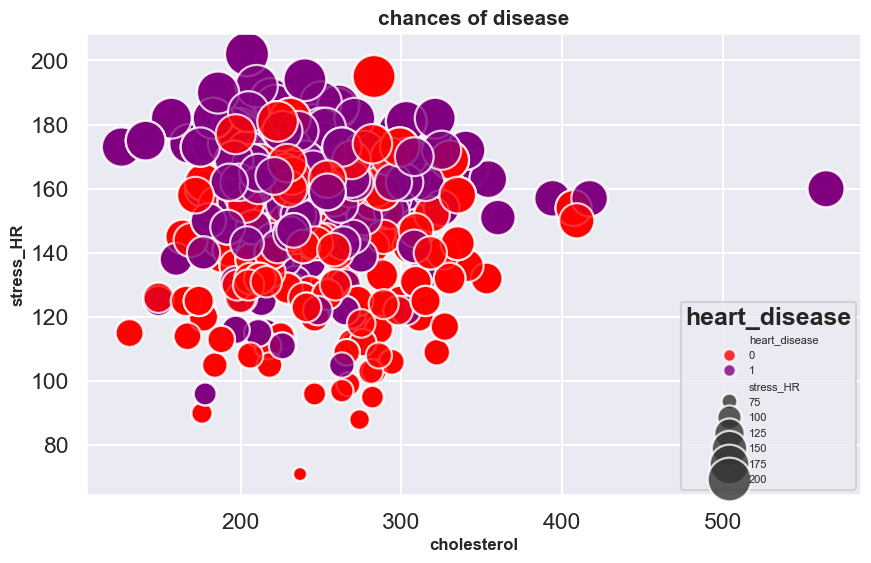

In [24]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.set_context('talk')

# Define colors
colors = ['red', 'purple']

# Define plot
plot = sns.scatterplot(data=df, x='cholesterol', y='stress_HR', hue='heart_disease', size='stress_HR', sizes=(100, 1000), alpha=0.8, palette=colors)

# Set title and axis labels
plot.set_title('chances of disease', fontsize=15, fontweight='bold')
plot.set_xlabel('cholesterol', fontsize=12, fontweight='bold')
plot.set_ylabel('stress_HR', fontsize=12, fontweight='bold')

# Set legend title and font size
legend = plot.legend(title='heart_disease', fontsize=8)
legend.get_title().set_fontweight('bold')

plt.show()

The above bubble plot shows the relationship between 'cholesterol', 'stress_HR', 
and 'heart_disease'. 
The bubbles in the plot represent the data points, and the size of the bubbles 
indicates the frequency of the data points.

In [26]:
import plotly.express as px

In [29]:
# if any time we are finding an error that library is not defined 
# !pip install library name

# Create a 3D scatter plot

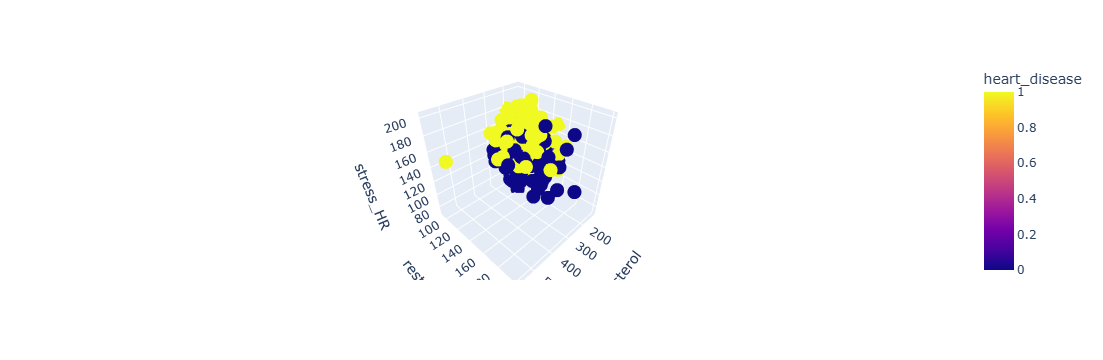

In [27]:

fig = px.scatter_3d(df, x='cholesterol', y='rest_bp', z='stress_HR', color='heart_disease')

# Show the plot
fig.show()

The cholestroel is positively correlated with the stress hr. As the cholestroel increases,
the Stress HR also increases.

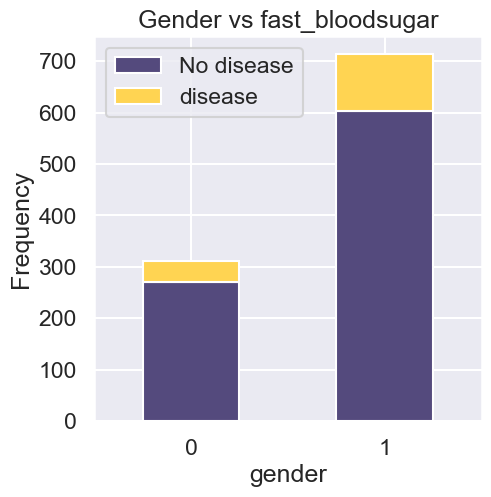

In [28]:
pd.crosstab(df.gender,df.fast_bloodsugar).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Gender vs fast_bloodsugar')
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.legend(["No disease", "disease"])
plt.xticks(rotation=0)
plt.show()

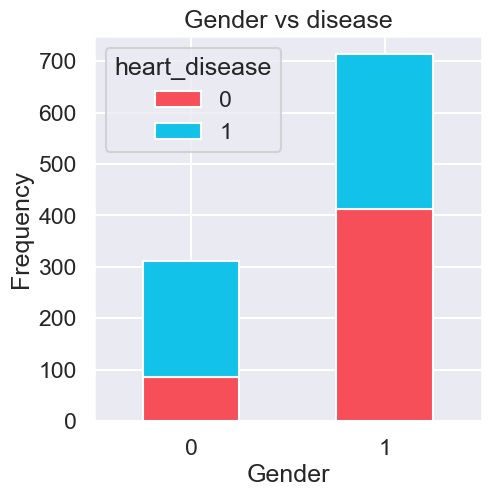

In [29]:
pd.crosstab(df.gender,df.heart_disease).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs disease')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [30]:
df.skew()

age                  -0.248866
gender               -0.851449
rest_bp               0.739768
cholesterol           1.074073
fast_bloodsugar       1.971339
stress_HR            -0.513777
Exercise_cp           0.692655
STdepression_Exerc    1.210899
heart_disease        -0.052778
rest_cp_1             1.828153
rest_cp_2             0.997664
rest_cp_3             3.228531
rest_ecg_1           -0.001954
rest_ecg_2            8.095675
STpeak_exerc_1        0.119411
STpeak_exerc_2        0.170621
coloured_vessels_1    1.350403
coloured_vessels_2    2.194022
coloured_vessels_3    3.458648
coloured_vessels_4    7.356675
thalassmia_1          3.622238
thalassmia_2         -0.123340
thalassmia_3          0.408847
dtype: float64

In [31]:
df.kurt()

age                   -0.525618
gender                -1.277531
rest_bp                0.991221
cholesterol            3.996803
fast_bloodsugar        1.889859
stress_HR             -0.088822
Exercise_cp           -1.523205
STdepression_Exerc     1.314471
heart_disease         -2.001123
rest_cp_1              1.344762
rest_cp_2             -1.006635
rest_cp_3              8.439874
rest_ecg_1            -2.003910
rest_ecg_2            63.664166
STpeak_exerc_1        -1.989627
STpeak_exerc_2        -1.974746
coloured_vessels_1    -0.176761
coloured_vessels_2     2.819228
coloured_vessels_3     9.981721
coloured_vessels_4    52.222564
thalassmia_1          11.142349
thalassmia_2          -1.988671
thalassmia_3          -1.836431
dtype: float64

##### Square Root/cube root/log  Transformation if needed
"""
df.col_name = np.sqrt(df.col_name)
df.col_name = np.cbrt(df.col_name)
df.col_name = np.log(df.col_name)
"""

In [34]:
# lets split the dependent and independent variable

In [32]:
X=df.drop(["heart_disease"],axis=1)

Y=df["heart_disease"]

In [33]:
X.head()

age  gender  rest_bp  cholesterol  fast_bloodsugar  stress_HR  Exercise_cp  \
0   52       1      125          212                0        168            0   
1   53       1      140          203                1        155            1   
2   70       1      145          174                0        125            1   
3   61       1      148          203                0        161            0   
4   62       0      138          294                1        106            0   

   STdepression_Exerc  rest_cp_1  rest_cp_2  rest_cp_3  rest_ecg_1  \
0                 1.0      False      False      False        True   
1                 3.1      False      False      False       False   
2                 2.6      False      False      False        True   
3                 0.0      False      False      False        True   
4                 1.9      False      False      False        True   

   rest_ecg_2  STpeak_exerc_1  STpeak_exerc_2  coloured_vessels_1  \
0       False           False            True               False   
1       False           False           False               False   
2       False           False           False               False   
3       False           False            True                True   
4       False            True           False               False   

   coloured_vessels_2  coloured_vessels_3  coloured_vessels_4  thalassmia_1  \
0                True               False               False         False   
1               False               False               False         False   
2               False               False               False         False   
3               False               False               False         False   
4               False                True               False         False   

   thalassmia_2  thalassmia_3  
0         False          True  
1         False          True  
2         False          True  
3         False          True  
4          True         False

In [37]:
#scaling is rerequired for logistic regression

In [34]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [35]:
scale=MinMaxScaler()
X_scaled=scale.fit_transform(X)
X_scaled

array([[0.47916667, 1.        , 0.29245283, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.43396226, ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.48113208, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.1509434 , ..., 0.        , 1.        ,
        0.        ],
       [0.4375    , 0.        , 0.1509434 , ..., 0.        , 1.        ,
        0.        ],
       [0.52083333, 1.        , 0.24528302, ..., 0.        , 0.        ,
        1.        ]])

In [36]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

age  gender   rest_bp  cholesterol  fast_bloodsugar  stress_HR  \
0  0.479167     1.0  0.292453     0.196347              0.0   0.740458   
1  0.500000     1.0  0.433962     0.175799              1.0   0.641221   
2  0.854167     1.0  0.481132     0.109589              0.0   0.412214   
3  0.666667     1.0  0.509434     0.175799              0.0   0.687023   
4  0.687500     0.0  0.415094     0.383562              1.0   0.267176   

   Exercise_cp  STdepression_Exerc  rest_cp_1  rest_cp_2  rest_cp_3  \
0          0.0            0.161290        0.0        0.0        0.0   
1          1.0            0.500000        0.0        0.0        0.0   
2          1.0            0.419355        0.0        0.0        0.0   
3          0.0            0.000000        0.0        0.0        0.0   
4          0.0            0.306452        0.0        0.0        0.0   

   rest_ecg_1  rest_ecg_2  STpeak_exerc_1  STpeak_exerc_2  coloured_vessels_1  \
0         1.0         0.0             0.0             1.0                 0.0   
1         0.0         0.0             0.0             0.0                 0.0   
2         1.0         0.0             0.0             0.0                 0.0   
3         1.0         0.0             0.0             1.0                 1.0   
4         1.0         0.0             1.0             0.0                 0.0   

   coloured_vessels_2  coloured_vessels_3  coloured_vessels_4  thalassmia_1  \
0                 1.0                 0.0                 0.0           0.0   
1                 0.0                 0.0                 0.0           0.0   
2                 0.0                 0.0                 0.0           0.0   
3                 0.0                 0.0                 0.0           0.0   
4                 0.0                 1.0                 0.0           0.0   

   thalassmia_2  thalassmia_3  
0           0.0           1.0  
1           0.0           1.0  
2           0.0           1.0  
3           0.0           1.0  
4           1.0           0.0

In [37]:
# Corr() cofficient

In [42]:
corr_matrix=X_scaled.corr(method="spearman")

In [43]:
corr_matrix

age    gender   rest_bp  cholesterol  \
age                 1.000000 -0.105479  0.280189     0.203253   
gender             -0.105479  1.000000 -0.071923    -0.152997   
rest_bp             0.280189 -0.071923  1.000000     0.127010   
cholesterol         0.203253 -0.152997  0.127010     1.000000   
fast_bloodsugar     0.110958  0.027200  0.152272     0.034139   
stress_HR          -0.382724 -0.047053 -0.028880    -0.054794   
Exercise_cp         0.077594  0.139157  0.043791     0.088895   
STdepression_Exerc  0.264500  0.090896  0.146722     0.057102   
rest_cp_1          -0.158900 -0.035405 -0.101152     0.000509   
rest_cp_2          -0.077580 -0.106842 -0.028893    -0.070382   
rest_cp_3           0.069677  0.083960  0.136821    -0.040155   
rest_ecg_1         -0.171579 -0.003595 -0.150506    -0.179715   
rest_ecg_2          0.050721 -0.113602  0.027920     0.034900   
STpeak_exerc_1      0.175384 -0.013950  0.024839     0.056458   
STpeak_exerc_2     -0.192158 -0.009537 -0.066865    -0.039662   
coloured_vessels_1  0.175453  0.101220 -0.063005     0.049753   
coloured_vessels_2  0.235372 -0.026489  0.083119     0.075047   
coloured_vessels_3  0.154969  0.059255  0.085909     0.108920   
coloured_vessels_4 -0.121615  0.088441  0.039382    -0.117334   
thalassmia_1        0.052235  0.135659  0.071484    -0.096283   
thalassmia_2       -0.129420 -0.367115 -0.115575     0.003964   
thalassmia_3        0.111802  0.310740  0.086115     0.056103   

                    fast_bloodsugar  stress_HR  Exercise_cp  \
age                        0.110958  -0.382724     0.077594   
gender                     0.027200  -0.047053     0.139157   
rest_bp                    0.152272  -0.028880     0.043791   
cholesterol                0.034139  -0.054794     0.088895   
fast_bloodsugar            1.000000  -0.016292     0.049261   
stress_HR                 -0.016292   1.000000    -0.405000   
Exercise_cp                0.049261  -0.405000     1.000000   
STdepression_Exerc         0.032542  -0.439987     0.322149   
rest_cp_1                 -0.066185   0.259364    -0.247159   
rest_cp_2                  0.077124   0.165372    -0.270282   
rest_cp_3                  0.046805   0.098530    -0.101175   
rest_ecg_1                -0.085279   0.142024    -0.093602   
rest_ecg_2                -0.051047  -0.132505     0.050741   
STpeak_exerc_1            -0.032623  -0.435067     0.255496   
STpeak_exerc_2            -0.022019   0.473394    -0.293649   
coloured_vessels_1        -0.011455  -0.200732     0.154041   
coloured_vessels_2         0.129926  -0.038514     0.109613   
coloured_vessels_3         0.073210  -0.196519    -0.001849   
coloured_vessels_4         0.006528   0.072546    -0.048075   
thalassmia_1               0.095579  -0.168389     0.063645   
thalassmia_2              -0.088882   0.320378    -0.327249   
thalassmia_3               0.026825  -0.236504     0.295004   

                    STdepression_Exerc  rest_cp_1  rest_cp_2  rest_cp_3  \
age                           0.264500  -0.158900  -0.077580   0.069677   
gender                        0.090896  -0.035405  -0.106842   0.083960   
rest_bp                       0.146722  -0.101152  -0.028893   0.136821   
cholesterol                   0.057102   0.000509  -0.070382  -0.040155   
fast_bloodsugar               0.032542  -0.066185   0.077124   0.046805   
stress_HR                    -0.439987   0.259364   0.165372   0.098530   
Exercise_cp                   0.322149  -0.247159  -0.270282  -0.101175   
STdepression_Exerc            1.000000  -0.312070  -0.138402   0.098750   
rest_cp_1                    -0.312070   1.000000  -0.273127  -0.125735   
rest_cp_2                    -0.138402  -0.273127   1.000000  -0.176438   
rest_cp_3                     0.098750  -0.125735  -0.176438   1.000000   
rest_ecg_1                   -0.131859   0.102599   0.095311  -0.055797   
rest_ecg_2                    0.150359  -0.053765  -0.020987  -0.034732   
STpeak_exerc_1               

<Axes: >

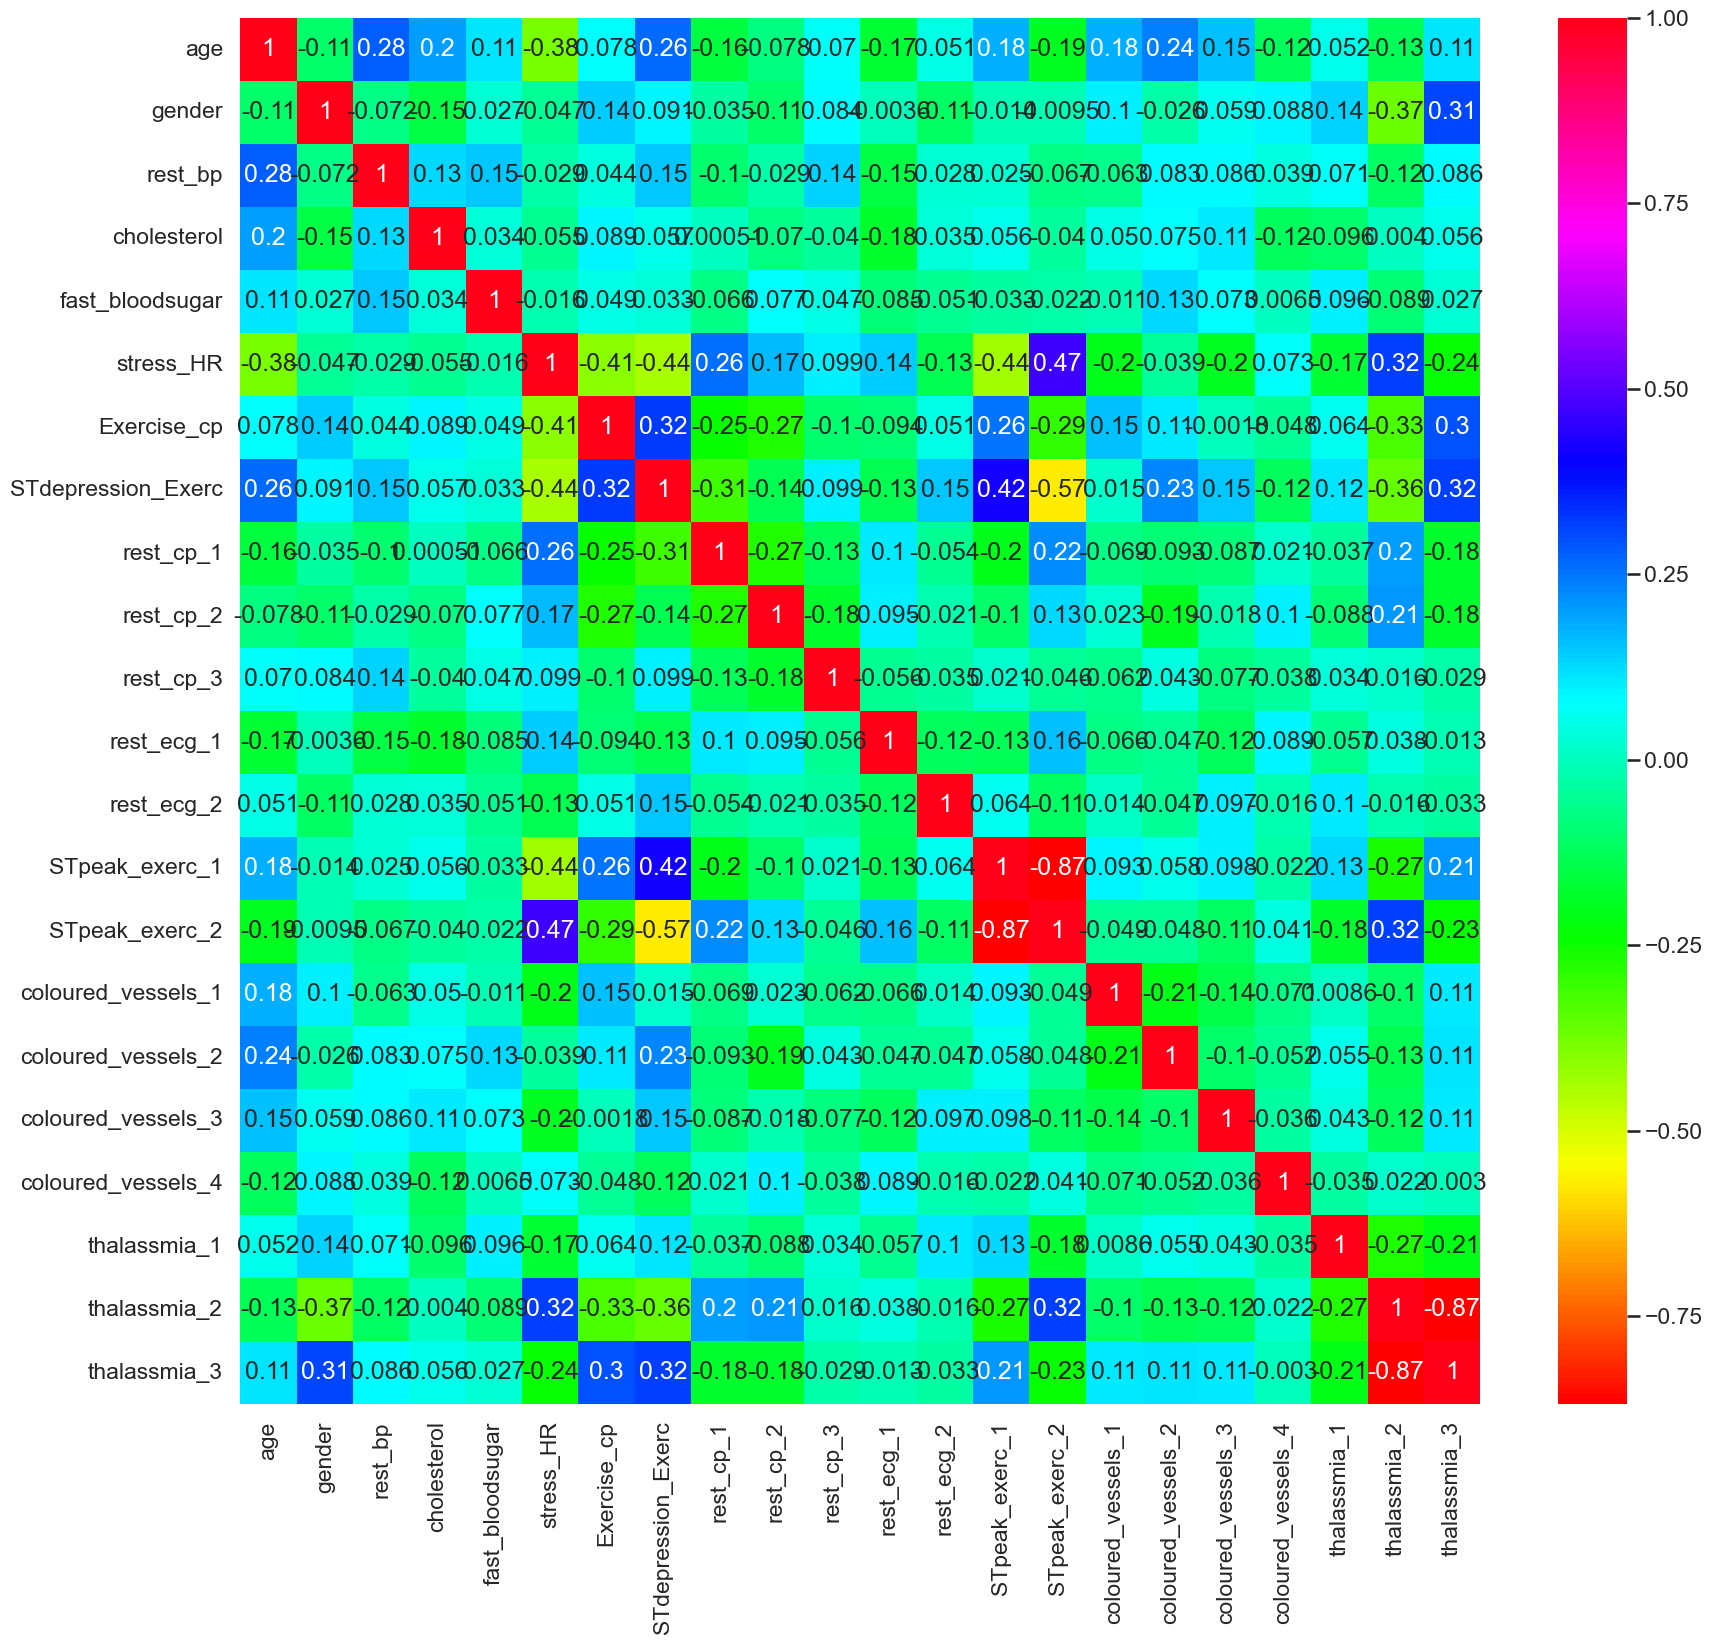

In [44]:
plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix,annot=True,cmap="hsv")

In [45]:
# lets take the bench mark for multi-collinearity is 0.85 ( means <-0.85, or >0.85)
#we will drop any one column to avoid the multi-collinearity.

In [46]:
X_scaled=X_scaled.drop(["thalassmia_2","STpeak_exerc_1"],axis=1)

In [47]:
corr_matrix1=X_scaled.corr(method="spearman")

<Axes: >

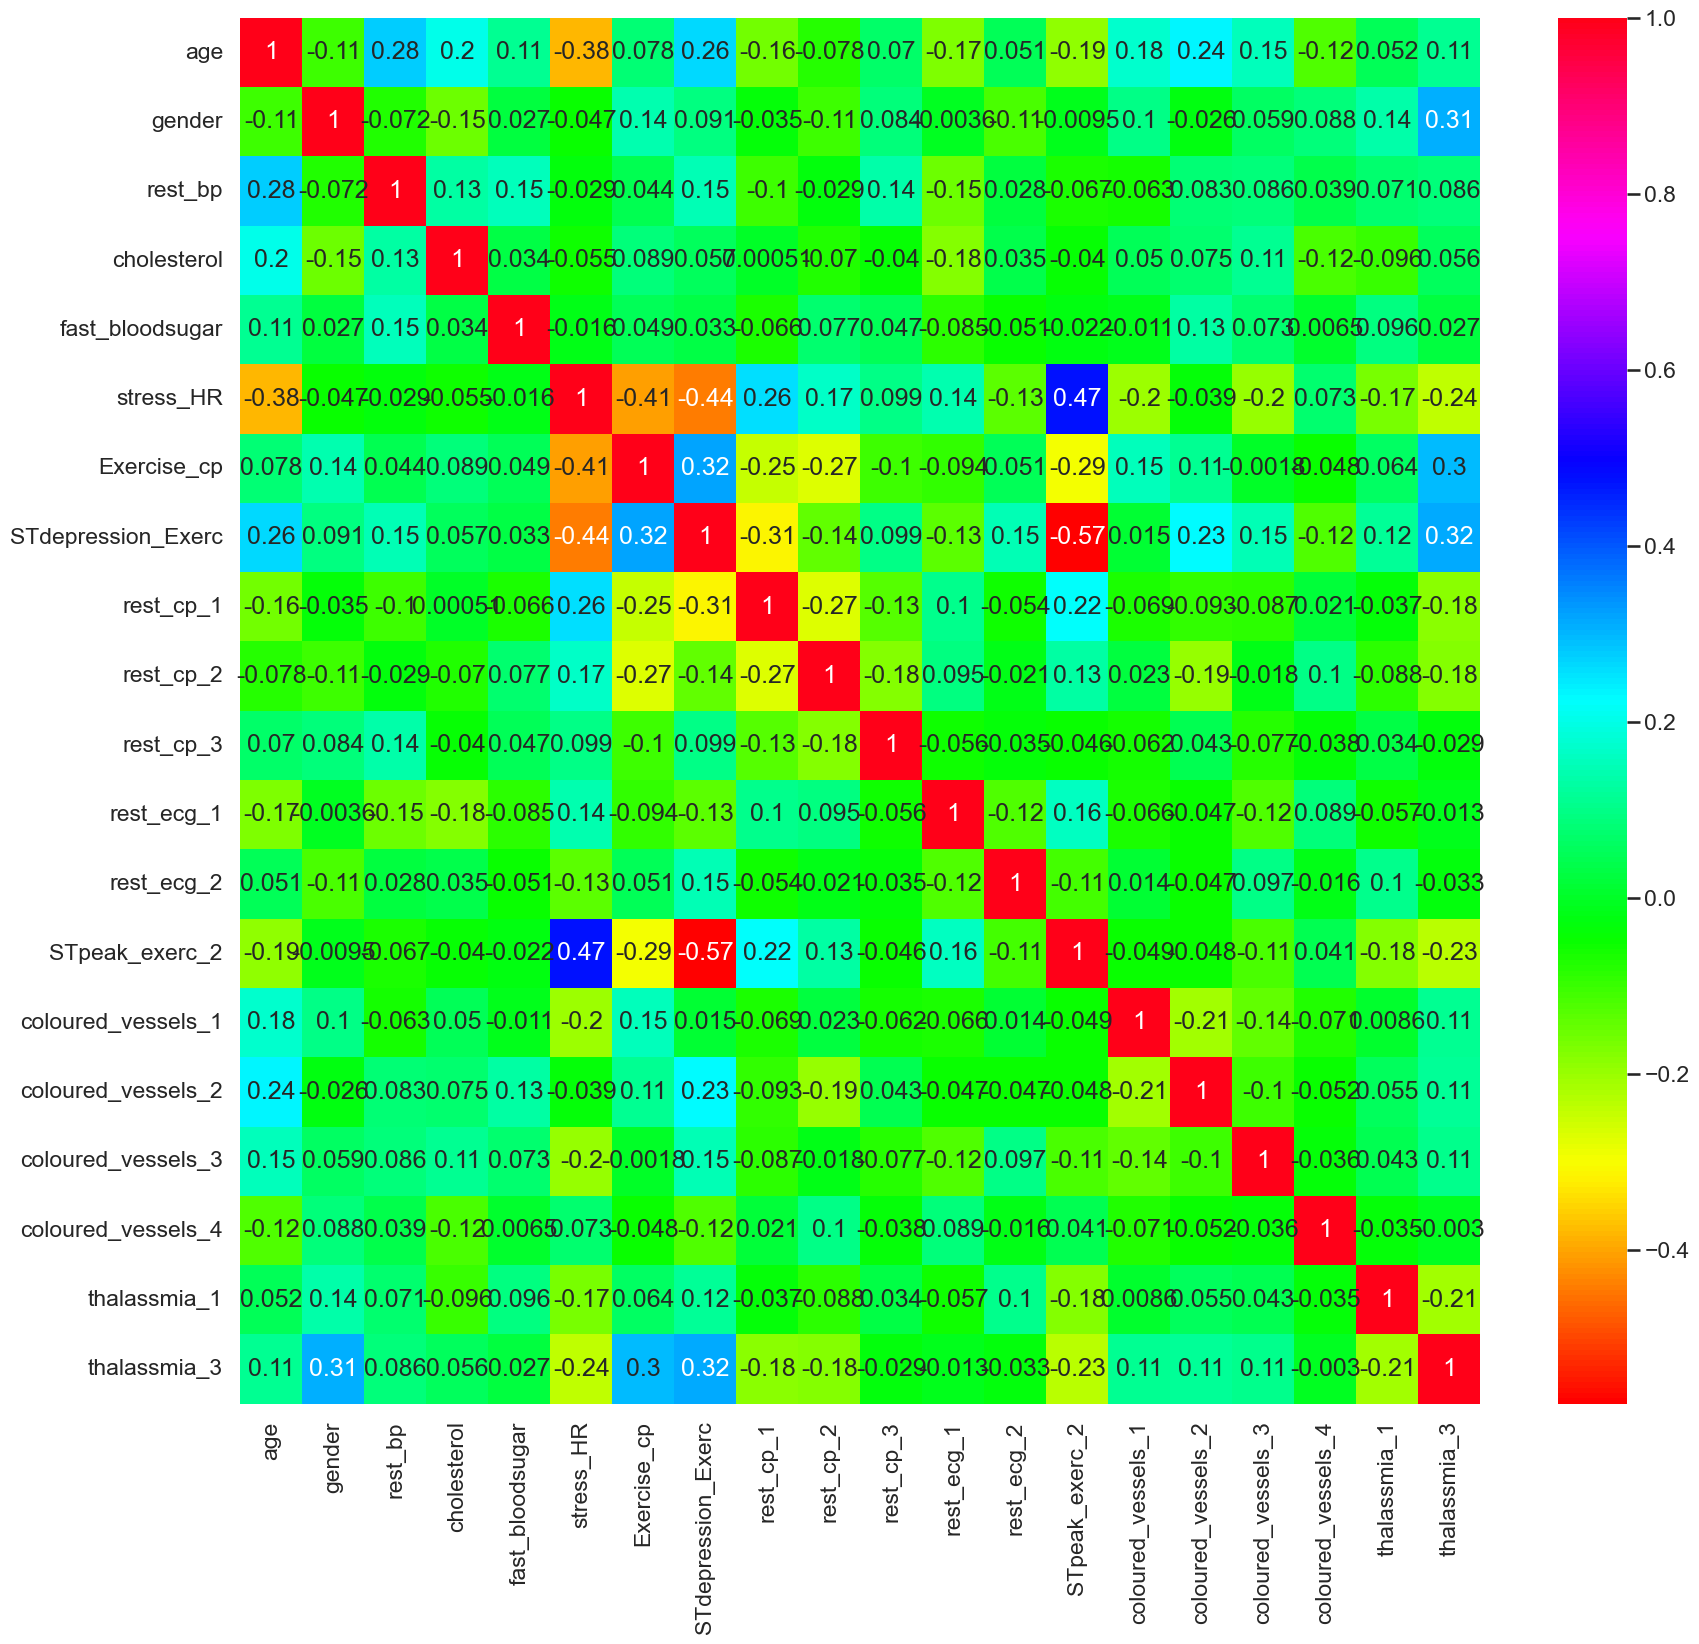

In [48]:
plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix1,annot=True,cmap="hsv")

In [49]:
# split the data in train and test

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=100,stratify=Y)

In [52]:
# stratified sampling approach - only use in the classification problem 
# whatever proportion the different categories are there-- maintain the same proportion in the sample
# it is very useful for imbalanced dataset(one class is very high for example 90% vs 10%)

In [53]:
X_train.shape

(820, 20)

In [54]:
# model building --- Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
log_mod=LogisticRegression()

In [57]:
# train the model

In [58]:
log_mod.fit(X_train,Y_train)

LogisticRegression()

In [59]:
# training is complete

In [60]:
# suppose u want to check the training performance

In [61]:
Y_train_predict=log_mod.predict(X_train)

In [62]:
# model evaluation of classification problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
accuracy_score(Y_train,Y_train_predict)

0.8768292682926829

In [64]:
confusion_matrix(Y_train,Y_train_predict)

array([[343,  56],
       [ 45, 376]], dtype=int64)

error -- 56 and 45
56- type 1 error-- False positive
45-- type 2 error-- False Negative

In [108]:
print(classification_report(Y_train,Y_train_predict))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       399
           1       0.87      0.89      0.88       421

    accuracy                           0.88       820
   macro avg       0.88      0.88      0.88       820
weighted avg       0.88      0.88      0.88       820



In [52]:
# check the performance for test dataset

In [109]:
Y_predict_test=log_mod.predict(X_test)

In [110]:
accuracy_score(Y_test,Y_predict_test)

0.8536585365853658

In [111]:
confusion_matrix(Y_test,Y_predict_test)

array([[81, 19],
       [11, 94]], dtype=int64)

In [112]:
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       100
           1       0.83      0.90      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [113]:
Y_test.head(10)

472    1
29     0
122    0
173    1
36     1
199    0
337    1
430    0
769    1
694    0
Name: heart_disease, dtype: int64

In [114]:
Y_predict_test

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [115]:
X_test.head(2)

age  gender   rest_bp  cholesterol  fast_bloodsugar  stress_HR  \
472  0.604167     0.0  0.339623     0.162100              0.0   0.458015   
29   0.541667     0.0  0.811321     0.458904              0.0   0.351145   

     Exercise_cp  STdepression_Exerc  rest_cp_1  rest_cp_2  rest_cp_3  \
472          0.0            0.096774        0.0        0.0        0.0   
29           1.0            0.548387        0.0        0.0        0.0   

     rest_ecg_1  rest_ecg_2  STpeak_exerc_2  coloured_vessels_1  \
472         1.0         0.0             0.0                 0.0   
29          0.0         1.0             0.0                 0.0   

     coloured_vessels_2  coloured_vessels_3  coloured_vessels_4  thalassmia_1  \
472                 0.0                 0.0                 0.0           0.0   
29                  0.0                 0.0                 0.0           0.0   

     thalassmia_3  
472           0.0  
29            0.0

In [60]:
#find the probability score
#predict_proba will return the probability score

In [116]:
probability_score=log_mod.predict_proba(X_test)
probability_score

array([[0.14918003, 0.85081997],
       [0.86519142, 0.13480858],
       [0.99708321, 0.00291679],
       [0.00347711, 0.99652289],
       [0.55714141, 0.44285859],
       [0.94592483, 0.05407517],
       [0.57379219, 0.42620781],
       [0.53248734, 0.46751266],
       [0.06364505, 0.93635495],
       [0.78056737, 0.21943263],
       [0.20600903, 0.79399097],
       [0.95843972, 0.04156028],
       [0.53248734, 0.46751266],
       [0.99708321, 0.00291679],
       [0.45243272, 0.54756728],
       [0.46992587, 0.53007413],
       [0.03316397, 0.96683603],
       [0.98385199, 0.01614801],
       [0.04081901, 0.95918099],
       [0.29369901, 0.70630099],
       [0.04478256, 0.95521744],
       [0.63738099, 0.36261901],
       [0.20982477, 0.79017523],
       [0.57379219, 0.42620781],
       [0.05819709, 0.94180291],
       [0.17012327, 0.82987673],
       [0.25177751, 0.74822249],
       [0.22026841, 0.77973159],
       [0.01287016, 0.98712984],
       [0.99561492, 0.00438508],
       [0.

In [ ]:
ROC AUC
#Receiver operative charactics
#AUC- area under the curve

In [117]:
from sklearn.metrics import roc_auc_score

# predict probabilities
probability_prediction_positive = log_mod.predict_proba(X_test)[:,1]



In [119]:
probability_prediction_positive

array([0.85081997, 0.13480858, 0.00291679, 0.99652289, 0.44285859,
       0.05407517, 0.42620781, 0.46751266, 0.93635495, 0.21943263,
       0.79399097, 0.04156028, 0.46751266, 0.00291679, 0.54756728,
       0.53007413, 0.96683603, 0.01614801, 0.95918099, 0.70630099,
       0.95521744, 0.36261901, 0.79017523, 0.42620781, 0.94180291,
       0.82987673, 0.74822249, 0.77973159, 0.98712984, 0.00438508,
       0.20219429, 0.01290658, 0.54756728, 0.9719145 , 0.03485724,
       0.02347763, 0.01401871, 0.94369336, 0.75327315, 0.8822911 ,
       0.05651605, 0.66205296, 0.62596951, 0.92142932, 0.23467665,
       0.80597976, 0.98724916, 0.03793978, 0.97130319, 0.02454074,
       0.70650321, 0.96772604, 0.45723773, 0.95350128, 0.93670395,
       0.69755113, 0.92316547, 0.17490394, 0.68188229, 0.77059264,
       0.91932374, 0.9891048 , 0.05651605, 0.68548283, 0.10349387,
       0.94077203, 0.9206716 , 0.02928907, 0.04649334, 0.97206722,
       0.00656503, 0.00423582, 0.68548283, 0.9717339 , 0.92842

In [120]:
# auc scores
auc_score1 = roc_auc_score(Y_test, probability_prediction_positive)


from sklearn.metrics import roc_curve
# finding false positive rate,true positive rate
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, probability_prediction_positive, pos_label=1)




"""
roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
"""




print("AUC SCORE:",auc_score1)

AUC SCORE: 0.9335238095238095


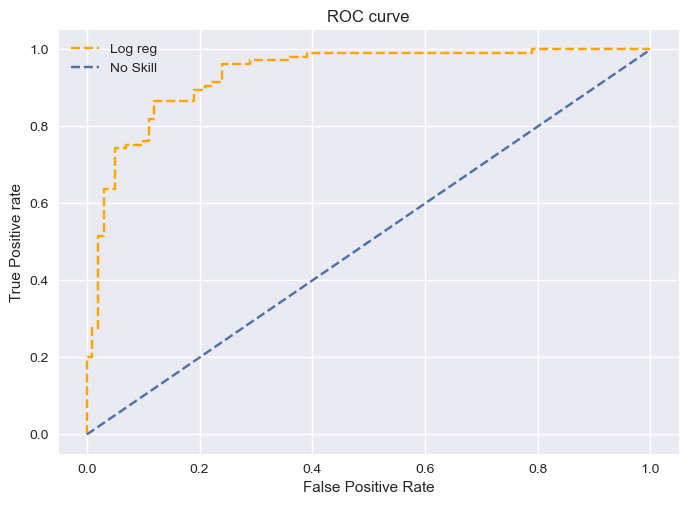

In [122]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Log reg')

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.savefig('ROC', dpi=300)
plt.show()